# Downloading Dataset and all the Dependecies

In [ ]:
!gdown 1j954Vqxu82Z5q8y7tCckckwrauV20olB

Downloading...
From: https://drive.google.com/uc?id=1j954Vqxu82Z5q8y7tCckckwrauV20olB
To: /content/Pandemic_NLP_train.csv
100% 10.5M/10.5M [00:00<00:00, 42.0MB/s]


In [ ]:
!pip install nltk

In [ ]:
!pip install wordninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=e109afd6c8220d055b68b32fa9c2266dc08c967c04768ff7af091590f43e86d3
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja


In [ ]:
!pip install wordcloud

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2024-10-02 14:33:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-02 14:33:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-02 14:33:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

## Importing All The Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import re
import nltk
import wordninja
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from keras.models import Sequential, load_model
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
df = pd.read_csv('Pandemic_NLP_train.csv',encoding='latin-1').drop(["UserName","ScreenName","Location","TweetAt"],axis=1)
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## EDA On the data to carefully understand the behaviour and pattern of the data

Total instances and insights of the data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [ ]:
df.duplicated().sum()

0

So, its clear that data has **NO null and duplicate values**

Now next we need to understand


1.   Sentiment column
2.   Relation Between words and Sentiments (e.g some words will be frequently appear on positive sentiment but they might not in others)




This plot represents the pecentage of sentiments across the dataset


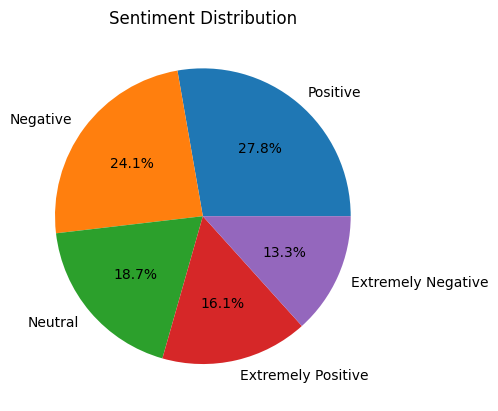

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
_ = plt.title('Sentiment Distribution')

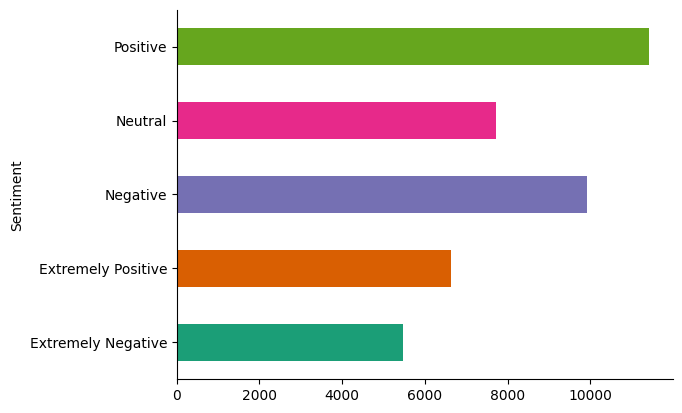

In [ ]:
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Seperate Each sentiment and tweets according to them but before we do that we need to clean the corpus so that all the unnecesssery words and characters can be fltered out



In [ ]:
def word_count(text):
    return len(text.split())

df['Word Count'] = df['OriginalTweet'].apply(word_count)
df['Word Count'].describe()

,Word Count
count,41157.000000
mean,30.500304
std,11.591172
min,1.000000
25%,21.000000
50%,32.000000
75%,40.000000
max,64.000000


In [ ]:
df[(df['Word Count']>=10)& (df['Word Count']<=40)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30486 entries, 1 to 41155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  30486 non-null  object
 1   Sentiment      30486 non-null  object
 2   Word Count     30486 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 952.7+ KB




```
# This is formatted as code
```

# Cleaning the Data


# New Pre processing

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


# 1. Remove all hashtag words
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# 3. Remove all stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# 4. Remove symbolic characters, make all letters lowercase
def remove_symbols_and_lowercase(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

# 5. Lemmatize the words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# 6. Remove words not present in dictionary and save them in a txt file
def filter_non_dictionary_words(tokens, dictionary):
    removed_words = [word for word in tokens if word not in dictionary]
    cleaned_words = [word for word in tokens if word in dictionary]

    # Save removed words to a txt file
    with open("removed_words.txt", "w") as file:
        for word in removed_words:
            file.write(f"{word}\n")
    return cleaned_words


# Main text cleaning function
def preprocess_text(text):
    # Step-by-step cleaning
    text = text.lower()
    text = remove_hashtags(text)                             # Step 1
    text = remove_symbols_and_lowercase(text)                # Step 4
    tokens = text.split()
    tokens = remove_stopwords(tokens)                        # Step 3
    tokens = lemmatize_words(tokens)                         # Step 5
    dictionary_words = set(nltk_words.words())               # Dictionary of valid English words
    tokens = filter_non_dictionary_words(tokens, dictionary_words)  # Step 6
    return tokens

Before Applying preprocess_text

Orginal Text looks like this :


In [ ]:
df["OriginalTweet"][4]

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [ ]:
(preprocess_text(df["OriginalTweet"][4]))

['ready',
 'supermarket',
 'outbreak',
 'paranoid',
 'food',
 'stock',
 'empty',
 'serious',
 'thing',
 'please',
 'dont',
 'panic',
 'cause',
 'shortage']

So what are the probable challanges ?


1.   Words like "confinementgeneral" it should be confinement general , so how do we fix them ?
2.   There are so many gen-z words like meds for medicine , poss for possible , how do we tackle them ?
3. What about spelling mistakes ?




In [ ]:
df["OriginalTweet"][3]

['food',
 'stock',
 'one',
 'empty',
 'please',
 'dont',
 'panic',
 'enough',
 'food',
 'everyone',
 'take',
 'need',
 'stay',
 'calm',
 'stay',
 'safe']

In [ ]:
df["OriginalTweet"] = df["OriginalTweet"].apply(preprocess_text)

In [ ]:
df.to_csv("cleaned_data.csv",index=False)

In [ ]:
data = df.copy()

data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: ' '.join(x))

def word_count(text):
    return len(text.split())

data['Word Count'] = data['OriginalTweet'].apply(word_count)
data['Word Count'].describe()

,Word Count
count,41157.000000
mean,12.933086
std,5.852227
min,0.000000
25%,8.000000
50%,13.000000
75%,17.000000
max,34.000000


In [ ]:
data = data[(data['Word Count']>=8)& (data['Word Count']<=25)]

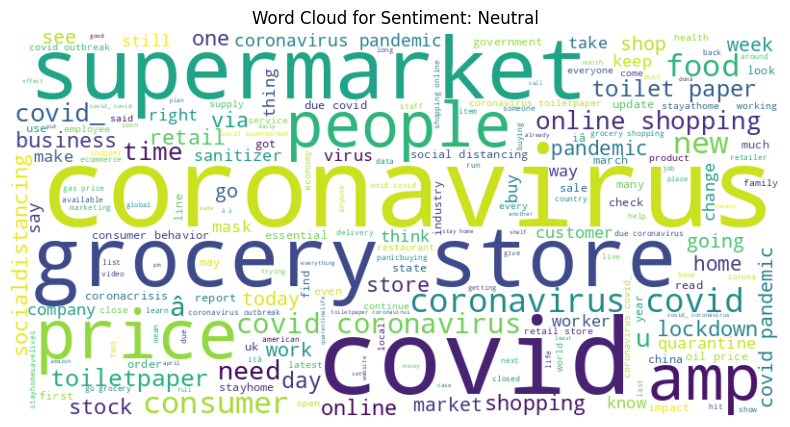

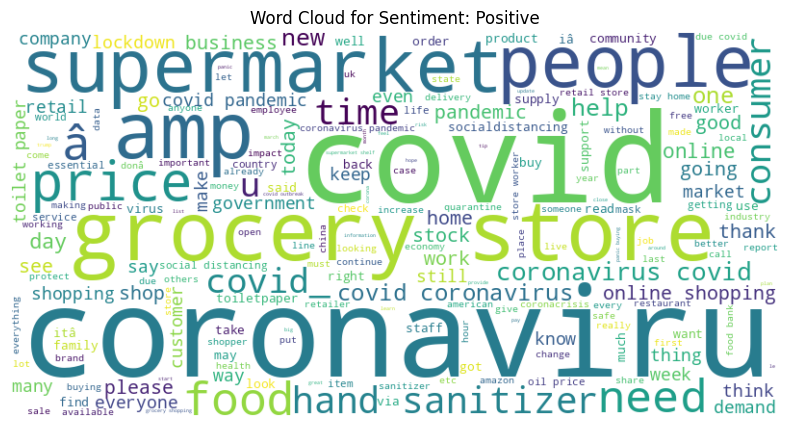

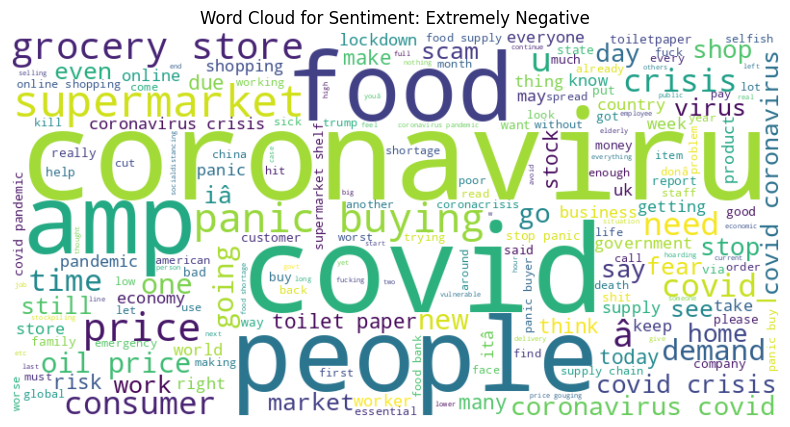

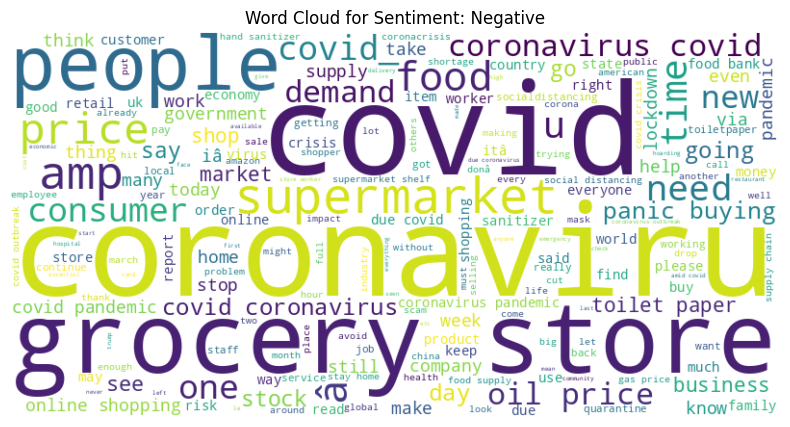

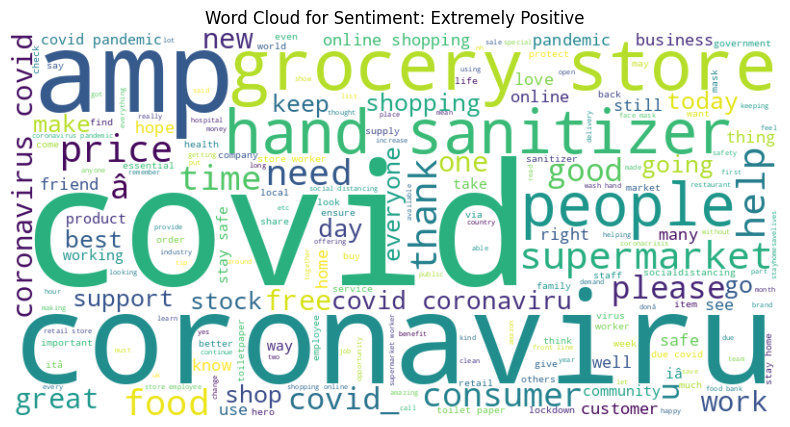

In [ ]:
def generate_wordcloud(sentiment, df):
    # Filter the dataframe by the sentiment
    sentiment_df = df[df['Sentiment'] == sentiment]

    # Join all tweets in the filtered dataframe into one large text
    all_text = ' '.join(sentiment_df['OriginalTweet'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    plt.show()

# List of unique sentiments
sentiments = df['Sentiment'].unique()

# Generate word cloud for each sentiment
for sentiment in sentiments:
    generate_wordcloud(sentiment, df)

# Word Count and Drop rows with less words

In [ ]:
def delist(text_list):
    return " ".join([word.strip("' ") for word in text_list])

In [ ]:
df = pd.read_csv('cleaned_data.csv')
df['OriginalTweet'] = df['OriginalTweet']
"""def word_count(text):
    return len(text.split())

df['Word Count'] = df['OriginalTweet'].apply(word_count)

df['OriginalTweet']"""

"def word_count(text):\n    return len(text.split())\n\ndf['Word Count'] = df['OriginalTweet'].apply(word_count)\n\ndf['OriginalTweet']"

In [ ]:
df = df[(df['Word Count']>=8)& (df['Word Count']<=25)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32006 entries, 1 to 41156
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  32006 non-null  object
 1   Sentiment      32006 non-null  object
 2   Word Count     32006 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1000.2+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.initializers import Constant
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load and Prepare the Data (assuming 'df' is already loaded)
X = df['OriginalTweet'].values
y = df['Sentiment'].values

# Step 2: Encode the sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split the data into train (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split the 20% temp data

# Step 4: Tokenize and pad the sequences
max_words = 10000  # Max number of words to keep in the vocabulary
max_len = 100      # Max length of sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input shape
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Step 5: Load GloVe embeddings
embedding_index = {}
embedding_dim = 200  # GloVe 100-dimensional embeddings
glove_file_path = "/content/glove.6B.200d.txt"  # Update this path if necessary

# Load the GloVe file and build the embedding index
with open(glove_file_path, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Prepare the embedding matrix
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



# New model

In [ ]:
# Step 4: Create the Bidirectional LSTM Model with L2 Regularization
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

#module 1
model.add(Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))

#module2
model.add(Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.7))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))

#module3
model.add(Bidirectional(LSTM(128, return_sequences=False, kernel_regularizer=l2(0.1))))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

#output-module
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add ModelCheckpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

# Step 5: Train the Model with both callbacks
history = model.fit(X_train_pad, y_train, epochs=70, batch_size=128, validation_data=(X_val_pad, y_val),
                    callbacks=[checkpoint, early_stopping])

# Load the best saved model
best_model = load_model('best_model.keras')

# Step 9: Evaluate on the test set using the best saved model
y_pred = np.argmax(best_model.predict(X_test_pad), axis=1)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Epoch 1/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 55s 179ms/step - accuracy: 0.2609 - loss: 71.8127 - val_accuracy: 0.3039 - val_loss: 33.9050
Epoch 2/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.3122 - loss: 27.1060 - val_accuracy: 0.3632 - val_loss: 12.6304
Epoch 3/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 82s 192ms/step - accuracy: 0.3637 - loss: 10.1211 - val_accuracy: 0.4101 - val_loss: 4.9430
Epoch 4/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 79s 180ms/step - accuracy: 0.3991 - loss: 4.0742 - val_accuracy: 0.4001 - val_loss: 2.4515
Epoch 5/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 47s 182ms/step - accuracy: 0.4129 - loss: 2.1400 - val_accuracy: 0.4220 - val_loss: 1.6723
Epoch 6/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 80s 175ms/step - accuracy: 0.4505 - loss: 1.5360 - val_accuracy: 0.4201 - val_loss: 1.4984
Epoch 7/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.4672 - loss: 1.3599 - val_accuracy: 0.4380 - val_loss: 1.4259
Epoch 8/70
258/258 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.4630 - lo

In [ ]:
# Plotting train and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()